##### STATISTICS TESTING

In [89]:
import matplotlib.pyplot as plt
from itertools import combinations
from tabulate import tabulate
from scipy.stats import ttest_ind
import random
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import locale
import sys
import file_import
from pickle import load
from datetime import date
from scipy import stats

In [90]:
crime_df = pd.read_pickle('../data/pickled_df.pkl')

In [91]:
crime_df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN


##### STEP 1: DEFINE THE HYPOTHESIS

- Null Hypothesis (H0): There is no significant difference in crime rates between the two wards.
- Alternative Hypothesis (H1): There is a significant difference in crime rates between the two wards.

##### STEP 2: SELECT THE DATA

In [92]:
### A nan was discovered ###

# Get the list of all unique wards
all_wards = crime_df['Ward'].unique()

# Print the list of all wards
print(all_wards)

[ 8. 15.  5. 31. 23.  4.  3. 30. 33.  6. 46. 28. 24. 21. 36. 29. 18. 20.
 42. 44. 13. 12. 32.  2. 39. nan 10. 40. 14. 48. 17. 37. 47. 34. 27.  7.
 16.  9.  1. 41. 50. 43. 49. 35. 19. 26. 38. 45. 11. 25. 22.]


In [93]:
# Remove rows with NaN values
crime_df.dropna(subset=['Ward'], inplace=True)

# Sorted Wards
all_wards = sorted(crime_df['Ward'].unique())

# Get a count of all the wards
ward_count = len(all_wards)

# Print the statement with the count
print(f"{ward_count} Wards Identified")

# Print the top 10 unique wards
print('\nTop 10 Wards By Crime:')
for ward in all_wards[:10]:
    count = (crime_df['Ward'] == ward).sum()
    print(f"Ward {ward}: {count}")

50 Wards Identified

Top 10 Wards By Crime:
Ward 1.0: 138141
Ward 2.0: 255928
Ward 3.0: 220325
Ward 4.0: 145079
Ward 5.0: 173287
Ward 6.0: 239581
Ward 7.0: 196558
Ward 8.0: 199961
Ward 9.0: 187712
Ward 10.0: 123265


In [94]:
# Store the results of two ward combinations
results = []

# Iterate through the randomly selected combinations and calculate the total crimes count for each ward
for combination in random_combinations:
    ward1, ward2 = combination
    total_crimes_ward1 = (crime_df['Ward'] == ward1).sum()
    total_crimes_ward2 = (crime_df['Ward'] == ward2).sum()
    results.append([ward1, total_crimes_ward1, ward2, total_crimes_ward2])


columns = ['Ward 1', 'Total Crimes in Ward 1', 'Ward 2', 'Total Crimes in Ward 2']
table_df = pd.DataFrame(results, columns=columns)

# Display the table
print(tabulate(table_df, headers='keys', tablefmt='pretty', showindex=False))

+--------+------------------------+--------+------------------------+
| Ward 1 | Total Crimes in Ward 1 | Ward 2 | Total Crimes in Ward 2 |
+--------+------------------------+--------+------------------------+
|  7.0   |        196558.0        |  10.0  |        123265.0        |
|  1.0   |        138141.0        |  10.0  |        123265.0        |
|  4.0   |        145079.0        |  5.0   |        173287.0        |
|  4.0   |        145079.0        |  10.0  |        123265.0        |
|  5.0   |        173287.0        |  10.0  |        123265.0        |
|  2.0   |        255928.0        |  5.0   |        173287.0        |
|  1.0   |        138141.0        |  4.0   |        145079.0        |
|  2.0   |        255928.0        |  10.0  |        123265.0        |
|  8.0   |        199961.0        |  10.0  |        123265.0        |
|  1.0   |        138141.0        |  5.0   |        173287.0        |
|  1.0   |        138141.0        |  9.0   |        187712.0        |
|  6.0   |        23

In [101]:
# Calculate the total crimes for Ward 1 and Ward 2
ward1_total_crimes = (crime_df['Ward'] == 1.0).sum()
ward2_total_crimes = (crime_df['Ward'] == 2.0).sum()

# Print the results
print("Ward 1 Total Crimes:", ward1_total_crimes)
print("Ward 2 Total Crimes:", ward2_total_crimes)


Ward 1 Total Crimes: 138141
Ward 2 Total Crimes: 255928


In [115]:
crimes_by_year = crime_df.groupby('Year').size().reset_index(name='Total Crimes')
arrests_by_year = crime_df[crime_df['Arrest'] == True].groupby('Year').size().reset_index(name='Arrest_Count')
domestic_crimes_by_year = crime_df[crime_df['Domestic'] == True].groupby('Year').size().reset_index(name='Domestic_Crime_Count')


# Print the resulting DataFrame
print(crimes_by_year)
print(arrests_by_year)
print(domestic_crimes_by_year)

    Year  Total Crimes
0   2001          4301
1   2002        353695
2   2003        475964
3   2004        469399
4   2005        453771
5   2006        448175
6   2007        437082
7   2008        427165
8   2009        392822
9   2010        370487
10  2011        351961
11  2012        336266
12  2013        307475
13  2014        275743
14  2015        264773
15  2016        269808
16  2017        269091
17  2018        268807
18  2019        261275
19  2020        212161
20  2021        208722
21  2022        238702
22  2023        134315
    Year  Arrest_Count
0   2001           766
1   2002         98639
2   2003        141575
3   2004        144688
4   2005        140923
5   2006        135418
6   2007        131878
7   2008        110014
8   2009        110824
9   2010        100540
10  2011         96285
11  2012         90659
12  2013         86537
13  2014         79631
14  2015         70039
15  2016         53027
16  2017         52646
17  2018         53866
18  2019   

In [116]:
# print(crimes_by_year)
# print(arrests_by_year)

# Merge the "crimes_by_year" and "arrests_by_year" DataFrames on "Year"
crimes_vs_arrests = crimes_by_year.merge(arrests_by_year, on='Year', suffixes=('_crimes', '_arrests'))

# Calculate the percentage of arrests based on total crimes for each year
crimes_vs_arrests['Arrest_Percentage'] = crimes_vs_arrests['Arrest_Count'] / crimes_vs_arrests['Total Crimes'] * 100

# Round the percentage to a whole number. Don't want decimals, too messy
crimes_vs_arrests['Arrest_Percentage'] = crimes_vs_arrests['Arrest_Percentage'].round(0)

# Formatted to have % used
crimes_vs_arrests['Arrest_Percentage'] = crimes_vs_arrests['Arrest_Percentage'].apply(lambda x: f"{x:.0f}%")

# Changed index
crimes_vs_arrests = crimes_vs_arrests.set_index('Year')

# Rename the columns for clarity
crimes_vs_arrests = crimes_vs_arrests.rename(columns={
    'Total Crimes': 'Total Crimes',
    'Arrest_Count': 'Total Arrests',
    'Arrest_Percentage': 'Percent Arrested'
})

# Print the resulting DataFrame
print(crimes_vs_arrests)

      Total Crimes  Total Arrests Percent Arrested
Year                                              
2001          4301            766              18%
2002        353695          98639              28%
2003        475964         141575              30%
2004        469399         144688              31%
2005        453771         140923              31%
2006        448175         135418              30%
2007        437082         131878              30%
2008        427165         110014              26%
2009        392822         110824              28%
2010        370487         100540              27%
2011        351961          96285              27%
2012        336266          90659              27%
2013        307475          86537              28%
2014        275743          79631              29%
2015        264773          70039              26%
2016        269808          53027              20%
2017        269091          52646              20%
2018        268807          538

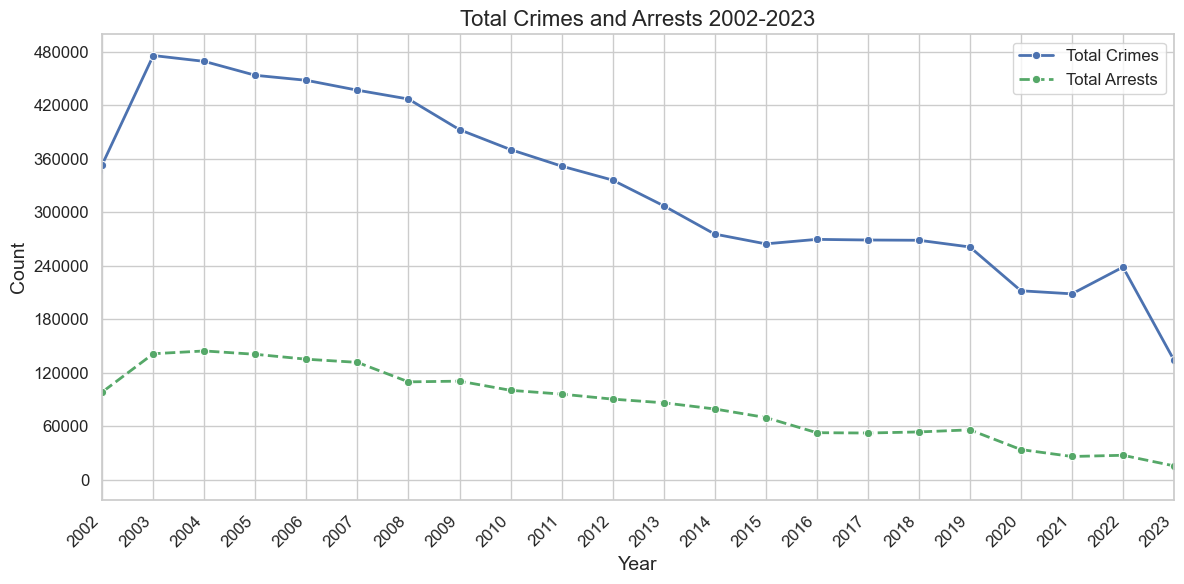

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Assuming you have already created the DataFrame "crimes_vs_arrests" using the provided code

# Set the style for the plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot the lines with appropriate style and labels
sns.lineplot(data=crimes_vs_arrests['Total Crimes'], marker='o', color='b', label='Total Crimes', linewidth=2)
sns.lineplot(data=crimes_vs_arrests['Total Arrests'], marker='o', color='g', label='Total Arrests', linestyle='dashed', linewidth=2)

# Customize the plot
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Total Crimes and Arrests 2002-2023', fontsize=16)
plt.xticks(crimes_vs_arrests.index, rotation=45, fontsize=12, ha='right')

# Set the x-axis limits to start at 2002
plt.xlim(2002, max(crimes_vs_arrests.index))

# Set the y-axis ticks to be more detailed
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.yticks(fontsize=12)
plt.grid(True)

# Set the legend
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



In [119]:
# Select the data for the years 2001 and 2020
year1_data = crimes_vs_arrests.loc[2001, 'Percent Arrested']
year2_data = crimes_vs_arrests.loc[2020, 'Percent Arrested']
print(year1_data)
print(year2_data)



18%
16%
